In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [218]:
# Load in the data set
df = pd.read_csv('./Resources/BankChurners.csv')

In [219]:
# Look at the df 

In [220]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [221]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [222]:
# Look at the data types of each col 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [223]:
# using .describe to get more insight on the data

df.describe(include=['O'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


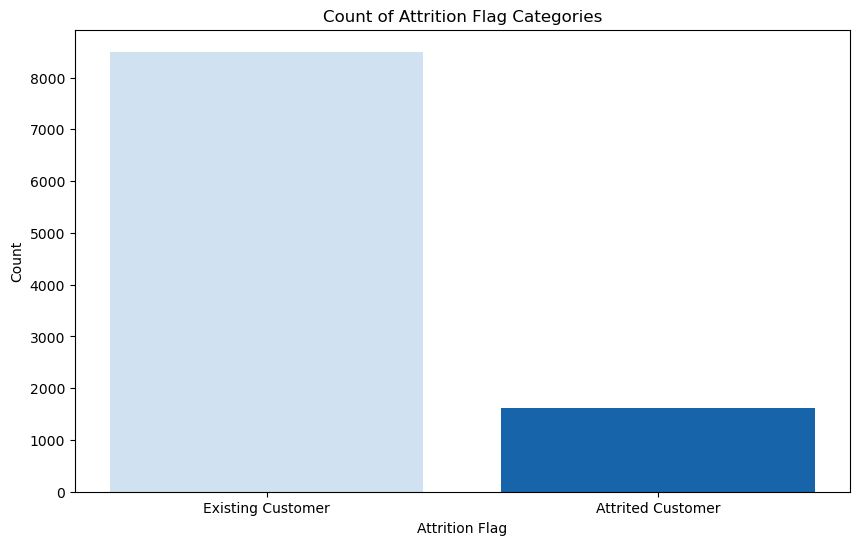

In [224]:
# Existing Customer VS. Attrited Customer - insights 

attrition_counts = df['Attrition_Flag'].value_counts()

categories = attrition_counts.index
counts = attrition_counts.values

plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(categories)))
plt.bar(categories, counts, color=colors)
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.title('Count of Attrition Flag Categories')

plt.show()

Text(0.5, 1.0, 'Age of Customers')

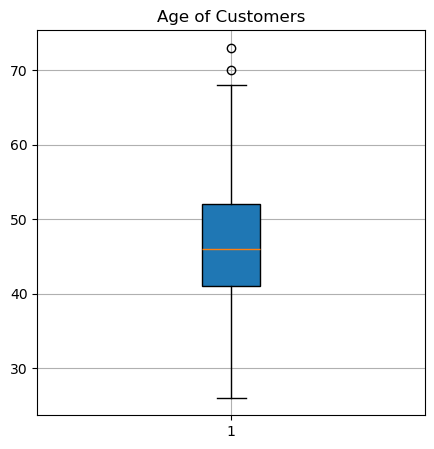

In [225]:
# Age of customers - insights 

plt.figure(figsize=(5, 5))
plt.grid(visible=True)
plt.boxplot(df['Customer_Age'],patch_artist=True);
plt.title('Age of Customers')

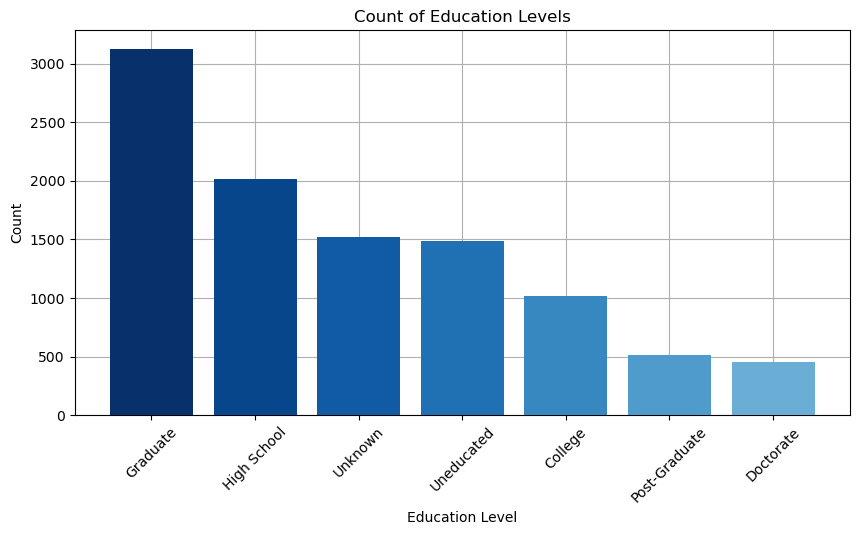

In [226]:
# Display education information - insights 

education_counts = df['Education_Level'].value_counts()

education_counts_sorted = education_counts.sort_values(ascending=False)

categories = education_counts_sorted.index
counts = education_counts_sorted.values

plt.figure(figsize=(10, 5))
plt.grid(visible=True)

colors = plt.cm.Blues(np.linspace(1, 0.5, len(categories)))
plt.bar(categories, counts, color=colors, zorder=3)

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count of Education Levels')
plt.xticks(rotation=45)  

plt.show()

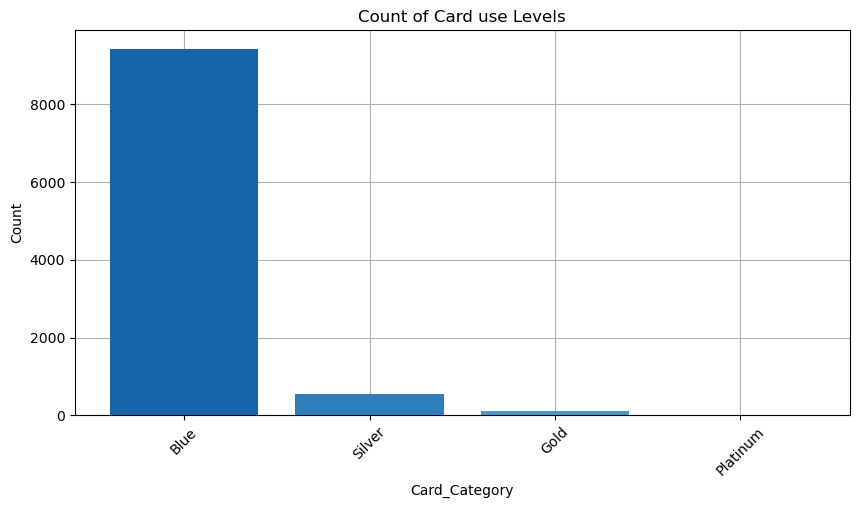

In [227]:
# Of the cards we offer, which is most used ? ----> Blue

card_counts = df['Card_Category'].value_counts()

card_counts = card_counts.sort_values(ascending=False)

categories = card_counts.index
counts = card_counts.values

plt.figure(figsize=(10, 5))
plt.grid(visible=True)

colors = plt.cm.Blues(np.linspace(0.8, 0.5, len(categories)))
plt.bar(categories, counts, color=colors, zorder=3)

plt.xlabel('Card_Category')
plt.ylabel('Count')
plt.title('Count of Card use Levels')
plt.xticks(rotation=45)  

plt.show()

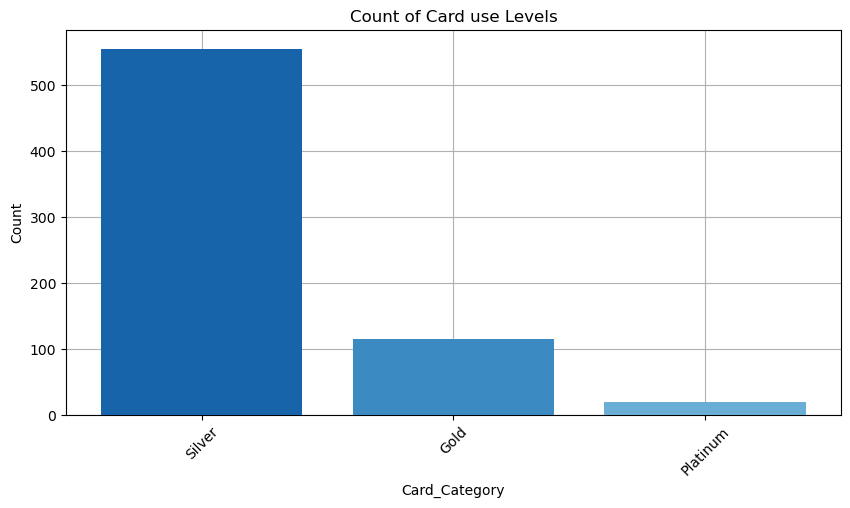

In [228]:
# Closer look at the numbers for non blue card consumers: 
# These could be high level clients, who we might want to offer better customer service to.

filtered_df = df[df['Card_Category'] != 'Blue']

card_counts = filtered_df['Card_Category'].value_counts()

card_counts = card_counts.sort_values(ascending=False)

categories = card_counts.index
counts = card_counts.values

plt.figure(figsize=(10, 5))
plt.grid(visible=True)

colors = plt.cm.Blues(np.linspace(0.8, 0.5, len(categories)))
plt.bar(categories, counts, color=colors, zorder=3)

plt.xlabel('Card_Category')
plt.ylabel('Count')
plt.title('Count of Card use Levels')
plt.xticks(rotation=45)  

plt.show()

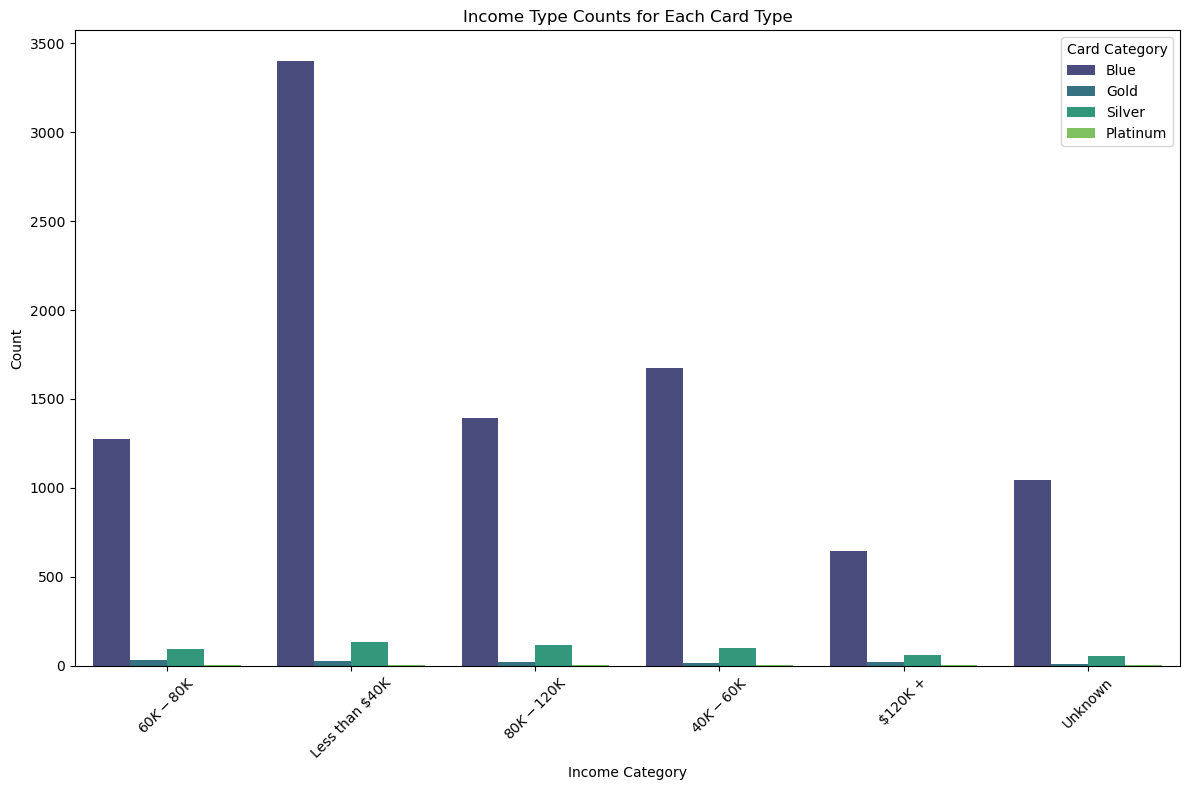

In [229]:
# lets look at the income categories of each card member 

plt.figure(figsize=(12, 8)) 
sns.countplot(data=df, x='Income_Category', hue='Card_Category', palette='viridis')
plt.title('Income Type Counts for Each Card Type')  
plt.xticks(rotation=45) 
plt.xlabel('Income Category') 
plt.ylabel('Count')  
plt.legend(title='Card Category') 
plt.tight_layout()  
plt.show()  



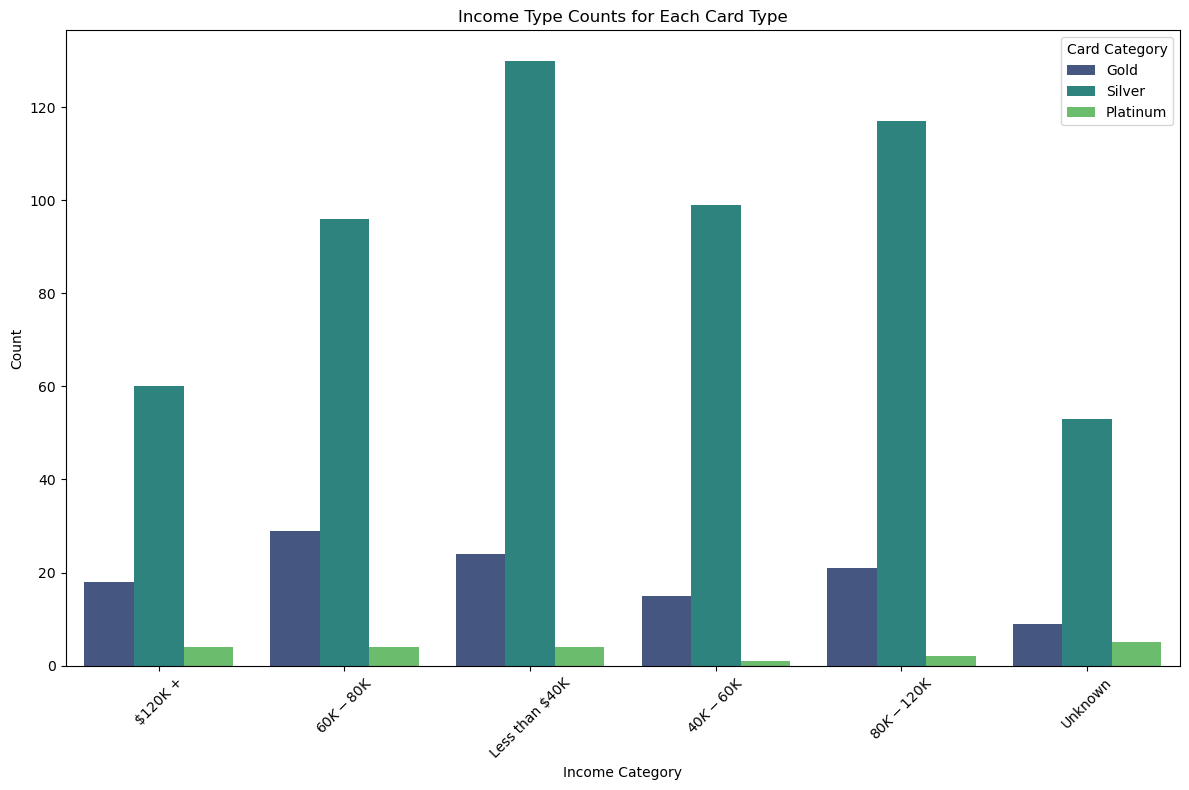

In [230]:
# A closer look at the counts of non blue card, card consumers

plt.figure(figsize=(12, 8)) 
sns.countplot(data=filtered_df, x='Income_Category', hue='Card_Category', palette='viridis')
plt.title('Income Type Counts for Each Card Type')  
plt.xticks(rotation=45) 
plt.xlabel('Income Category') 
plt.ylabel('Count')  
plt.legend(title='Card Category') 
plt.tight_layout()  
plt.show()  

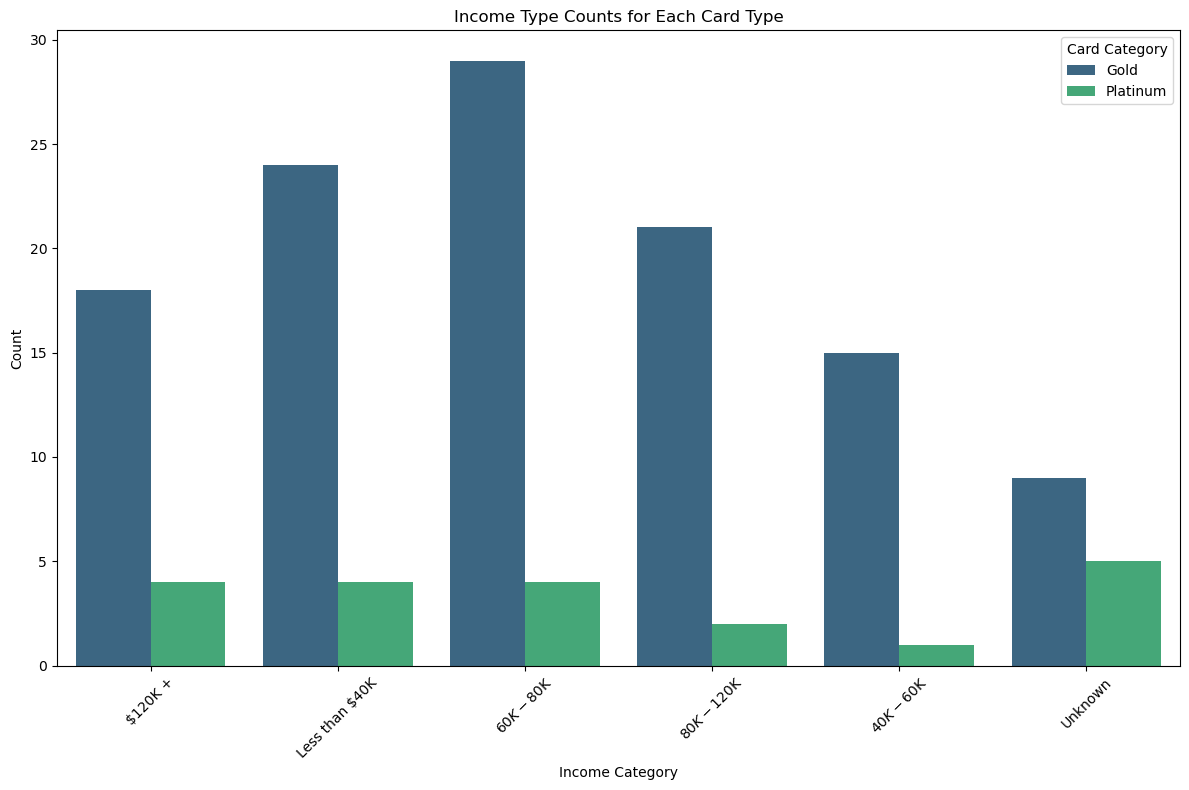

In [231]:
# A closer look at the counts of non blue non silver card, card consumers

filtered_df_bs = df[(df['Card_Category'] != 'Blue') & (df['Card_Category'] != 'Silver')]

plt.figure(figsize=(12, 8)) 
sns.countplot(data=filtered_df_bs, x='Income_Category', hue='Card_Category', palette='viridis')
plt.title('Income Type Counts for Each Card Type')  
plt.xticks(rotation=45) 
plt.xlabel('Income Category') 
plt.ylabel('Count')  
plt.legend(title='Card Category') 
plt.tight_layout()  
plt.show()  

In [232]:
print(
    '''
    After looking deeper into the salary ranges of each card holder, 
    it is clear that income level does not correlate to card type.

    One could use a model to make this distinction, but these vizualizations do not indicate that would be neccessary.

    However, Blue card holders are more that 93% of the current customer base. 
    With this insight, we should compare the fees and revenue related to each card type ...
    Though this data is not provided in the current dataset, for the scope of this project,
    it would be safe to assume the blue card is a great product, and we should investigate these
    holders further, to identify conditions that we would like a target client to meet.

    We could make use of these conditions to train a model, that will filter a dataset of non clients,
    to decide which ones to advertise to, or to call and pitch too. 

    Lets implement this idea. 

    Before we continue...
    Consider the fact that one platinum card could make the same revenue that any arbitrary number of blue cards can generate.
    Without the insights data on each cards financial stats, we are purely speculating going foreward, and only displaying 
    a logical use of python and its tools, not a logical decsion given our data set. 

    Perhaps I will generate a sim dataset of card financial stats... ;)
    '''
)



    After looking deeper into the salary ranges of each card holder, 
    it is clear that income level does not correlate to card type.

    One could use a model to make this distinction, but these vizualizations do not indicate that would be neccessary.

    However, Blue card holders are more that 93% of the current customer base. 
    With this insight, we should compare the fees and revenue related to each card type ...
    Though this data is not provided in the current dataset, for the scope of this project,
    it would be safe to assume the blue card is a great product, and we should investigate these
    holders further, to identify conditions that we would like a target client to meet.

    We could make use of these conditions to train a model, that will filter a dataset of non clients,
    to decide which ones to advertise to, or to call and pitch too. 

    Lets implement this idea. 

    Before we continue...
    Consider the fact that one platinum card could make the 

In [233]:
# Lets look into transactions, and try to identify our best customers. 
# Once we classify them ,we will know the type of person we want to advertise to.

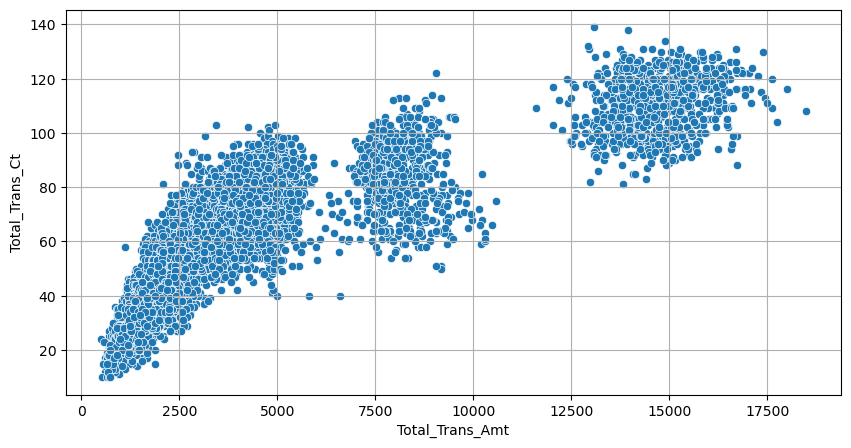

In [234]:
# Transaction Amount (xaxis) and Transaction Count (yaxis) 

plt.figure(figsize=(10,5))
plt.grid(visible=True)
sns.scatterplot(x='Total_Trans_Amt',y='Total_Trans_Ct',data=df);


In [259]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, silhouette_score
from sklearn.preprocessing import OneHotEncoder

In [260]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [261]:
# current customer 
current_customer_df = df[df['Attrition_Flag'] == 'Existing Customer']
current_customer_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,...,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170,0.000192,0.99981
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,...,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106,0.000516,0.99948
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,0.000038,0.99996
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,0.000148,0.99985


In [262]:
attritted_customer_df = df[df['Attrition_Flag'] != 'Existing Customer']
attritted_customer_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,0.99691,0.003088
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.99527,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.99788,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.99671,0.003294


In [263]:
# Step 1: Preprocessing for Clustering
# Selecting relevant features for clustering
features_for_clustering = ['Months_on_book', 'Total_Trans_Amt', 'Total_Trans_Ct']


In [264]:
current_customer_X_clustering = current_customer_df[features_for_clustering]

In [265]:
attritted_customer_X_clustering = attritted_customer_df[features_for_clustering]

In [266]:
current_customer_X_clustering.head()

,Months_on_book,Total_Trans_Amt,Total_Trans_Ct
0,39,1144,42
1,44,1291,33
2,36,1887,20
3,34,1171,20
4,21,816,28


In [267]:
attritted_customer_X_clustering.head()

,Months_on_book,Total_Trans_Amt,Total_Trans_Ct
21,49,692,16
39,56,704,16
51,40,705,19
54,36,602,15
61,35,691,15


In [268]:
# Standardizing the features
scaler = StandardScaler()
current_customer_X_clustering_scaled = scaler.fit_transform(current_customer_X_clustering)
attritted_customer_X_clustering_scaled = scaler.fit_transform(attritted_customer_X_clustering)

In [269]:
current_customer_X_clustering_scaled

array([[ 0.38888922, -0.99945621, -1.16384417],
       [ 1.01222665, -0.95760646, -1.55655437],
       [ 0.01488676, -0.78792993, -2.12380243],
       ...,
       [-0.23444821,  3.10950574,  1.97783744],
       [ 1.76023156,  2.83022273,  2.23964424],
       [ 0.51355671,  3.08075183,  2.10874084]])

In [270]:
attritted_customer_X_clustering_scaled

array([[ 1.64504844, -1.04138977, -1.98666001],
       [ 2.54315768, -1.03618938, -1.98666001],
       [ 0.49033657, -1.03575601, -1.78067196],
       ...,
       [-0.0228687 ,  3.1184908 ,  1.03449807],
       [-0.0228687 ,  2.2968288 ,  1.17182344],
       [-1.43418321,  3.1197909 ,  1.10316076]])

In [274]:
# Create an empty list to store the inertia values
current_customer_inertia = []

# Create a list with the number of k-values to try
k = list(range(1, 10))

# Create a for loop to compute the inertia with each possible value of k and add the values to the inertia list.
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(current_customer_X_clustering_scaled)
    current_customer_inertia.append(model.inertia_)

# Create a dictionary with the data to plot the elbow curve
elbow_data = {
    "k": k,
    "inertia": current_customer_inertia
}

# Create a DataFrame with the data to plot the elbow curve
current_customer_df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
current_customer_df_elbow

,k,inertia
0,1,25500.000000
1,2,15867.228170
2,3,10967.532086
3,4,7572.347170
4,5,6079.778674
5,6,5328.240118
6,7,4693.508354
7,8,4069.862650
8,9,3899.344218


In [275]:
# Create an empty list to store the inertia values
attritted_customer_inertia = []

# Create a list with the number of k-values to try
k = list(range(1, 10))

# Create a for loop to compute the inertia with each possible value of k and add the values to the inertia list.
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(attritted_customer_X_clustering_scaled)
    attritted_customer_inertia.append(model.inertia_)

# Create a dictionary with the data to plot the elbow curve
elbow_data = {
    "k": k,
    "inertia": attritted_customer_inertia
}

# Create a DataFrame with the data to plot the elbow curve
attritted_customer_df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
attritted_customer_df_elbow

,k,inertia
0,1,4881.000000
1,2,2614.461886
2,3,1871.528157
3,4,1525.239657
4,5,1235.965197
5,6,1048.771066
6,7,949.310470
7,8,866.159075
8,9,756.673060


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

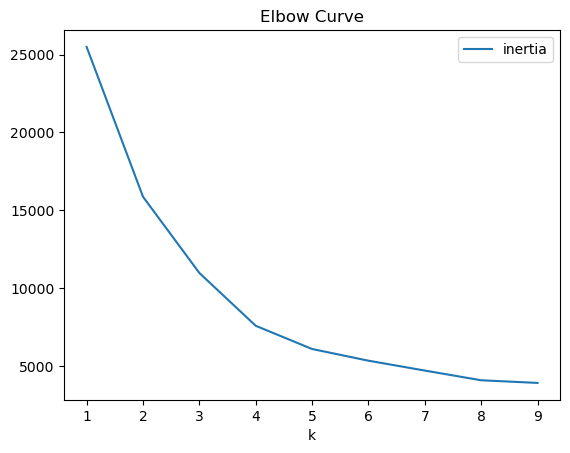

In [276]:
# Plot the Elbow curve
current_customer_df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

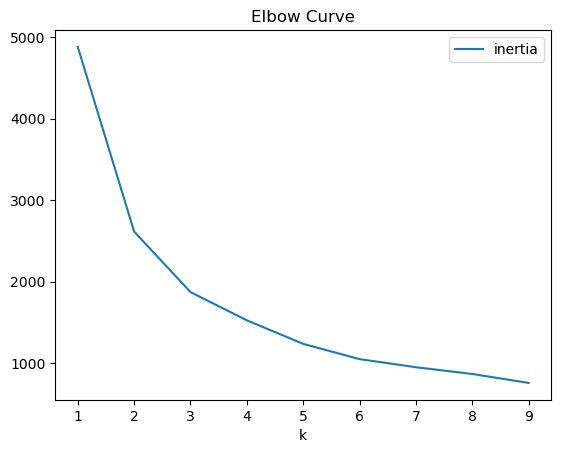

In [277]:
# Plot the Elbow curve
attritted_customer_df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [278]:
#### RUNNNING current customer params 

import time
start_time = time.time()

lout = []

for k in range(3, 8):
    k_lap_s = time.time()
    print("klap : ", k)
    for n in range(1, 101):
        print('Nlap : ', n)
        n_lap_s = time.time()
        for i in range(1, 97):
            kmeans = KMeans(n_clusters=k, n_init=n, random_state=i)
            labels = kmeans.fit_predict(current_customer_X_clustering_scaled)
            score = silhouette_score(current_customer_X_clustering_scaled, labels)
            lout.append((k, n, i, score))  
           
        n_lap_e = time.time()
        n_elapsed_time = n_lap_e - n_lap_s
        print(f"Elapsed time for n_lap: {n_elapsed_time} seconds")

    k_lap_e = time.time()
    k_elapsed_time = k_lap_e - k_lap_s
    print(f"Elapsed time for k_lap: {k_elapsed_time} seconds")
           
    
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for the small run: {elapsed_time} seconds")
       

    
    

# Finding the tuple with the highest score
highest_score_tuple = max(lout, key=lambda x: x[3])  # x[2] is the score in each tuple

k_best, n_best, i_best, highest_score = highest_score_tuple

print(f'The highest silhouette score is {highest_score}, achieved with k: {k_best} and n: {n_best} and i: {i_best}.')

klap :  3
Nlap :  1
Elapsed time for n_lap: 73.11924290657043 seconds
Nlap :  2
Elapsed time for n_lap: 72.53086543083191 seconds
Nlap :  3
Elapsed time for n_lap: 66.33697128295898 seconds
Nlap :  4
Elapsed time for n_lap: 73.8183946609497 seconds
Nlap :  5
Elapsed time for n_lap: 72.30478525161743 seconds
Nlap :  6
Elapsed time for n_lap: 72.65511584281921 seconds
Nlap :  7
Elapsed time for n_lap: 80.57832074165344 seconds
Nlap :  8
Elapsed time for n_lap: 78.08971977233887 seconds
Nlap :  9
Elapsed time for n_lap: 81.04186749458313 seconds
Nlap :  10
Elapsed time for n_lap: 77.41358685493469 seconds
Nlap :  11
Elapsed time for n_lap: 2149.8864572048187 seconds
Nlap :  12
Elapsed time for n_lap: 84.0543122291565 seconds
Nlap :  13
Elapsed time for n_lap: 82.61656069755554 seconds
Nlap :  14
Elapsed time for n_lap: 84.00323462486267 seconds
Nlap :  15
Elapsed time for n_lap: 74.7944986820221 seconds
Nlap :  16
Elapsed time for n_lap: 79.13164043426514 seconds
Nlap :  17
Elapsed time f

In [ ]:
####  attritted customer params 

import time
start_time = time.time()

lout = []

for k in range(3, 7):
    k_lap_s = time.time()
    print("klap : ", k)
    for n in range(1, 101):
        print('Nlap : ', n)
        n_lap_s = time.time()
        for i in range(1, 97):
            kmeans = KMeans(n_clusters=k, n_init=n, random_state=i)
            labels = kmeans.fit_predict(attritted_customer_X_clustering_scaled)
            score = silhouette_score(attritted_customer_X_clustering_scaled, labels)
            lout.append((k, n, i, score))  
           
        n_lap_e = time.time()
        n_elapsed_time = n_lap_e - n_lap_s
        print(f"Elapsed time for n_lap: {n_elapsed_time} seconds")

    k_lap_e = time.time()
    k_elapsed_time = k_lap_e - k_lap_s
    print(f"Elapsed time for k_lap: {k_elapsed_time} seconds")
           
    
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for the small run: {elapsed_time} seconds")
       

    
    

# Finding the tuple with the highest score
highest_score_tuple = max(lout, key=lambda x: x[3])  # x[2] is the score in each tuple

k_best, n_best, i_best, highest_score = highest_score_tuple

print(f'The highest silhouette score is {highest_score}, achieved with k: {k_best} and n: {n_best} and i: {i_best}.')

In [171]:
# import time
# start_time = time.time()

# lout = []
# nc = 4

# for k in range(4, 6):
#     k_lap_s = time.time()
#     print(k)
#     for n in range(5, 15):
#         n_lap_s = time.time()
#         for i in range(1, 20):
#             kmeans = KMeans(n_clusters=k, n_init=n, random_state=i)
#             labels = kmeans.fit_predict(X_clustering_scaled)
#             score = silhouette_score(X_clustering_scaled, labels)
#             lout.append((k, n, i, score))  
#             if(nc != n):
#                 nc+=1
#                 print(n)

#         n_lap_e = time.time()
#         n_elapsed_time = n_lap_e - n_lap_s
#         print(f"Elapsed time for n_lap: {n_elapsed_time} seconds")

#     k_lap_e = time.time()
#     k_elapsed_time = k_lap_e - k_lap_s
#     print(f"Elapsed time for k_lap: {k_elapsed_time} seconds")
           
    
# end_time = time.time()
# elapsed_time = end_time - start_time
# print(f"Elapsed time for the small run: {elapsed_time} seconds")
       

    
    

# # Finding the tuple with the highest score
# highest_score_tuple = max(lout, key=lambda x: x[3])  # x[2] is the score in each tuple

# k_best, n_best, i_best, highest_score = highest_score_tuple

# print(f'The highest silhouette score is {highest_score}, achieved with k: {k_best} and n: {n_best} and i: {i_best}.')
    

4
5
Elapsed time for n_lap: 19.10917901992798 seconds
6
Elapsed time for n_lap: 23.83982801437378 seconds
7
Elapsed time for n_lap: 23.52409338951111 seconds
8
Elapsed time for n_lap: 17.02756977081299 seconds
9
Elapsed time for n_lap: 20.66771101951599 seconds
10
Elapsed time for n_lap: 19.595237731933594 seconds
11
Elapsed time for n_lap: 21.481101512908936 seconds
12
Elapsed time for n_lap: 25.918936729431152 seconds
13
Elapsed time for n_lap: 18.95639181137085 seconds
14
Elapsed time for n_lap: 18.351949214935303 seconds
Elapsed time for k_lap: 208.4725685119629 seconds
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
Elapsed time for n_lap: 18.853183269500732 seconds
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
Elapsed time for n_lap: 16.141374826431274 seconds
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
Elapsed time for n_lap: 18.13931441307068 seconds
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
Elapsed time for n_lap: 20.507364988327026 seconds
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
Elapsed time for n_lap: 

In [282]:
# Apply K-means (choose an appropriate number of clusters; here we assume 3 based on domain knowledge or analysis like the elbow method)

# Elapsed time for n_lap: 36.74400877952576 seconds
# Elapsed time for k_lap: 1820.6366696357727 seconds
# Elapsed time for the small run: 3585.5608501434326 seconds
# The highest silhouette score is 0.3980967995672229, achieved with k: 4 and n: 47 and i: 28.

kmeans = KMeans(n_clusters=4, n_init=1, random_state=88)
current_customer_df['Cluster'] = kmeans.fit_predict(current_customer_X_clustering_scaled)
print(silhouette_score(current_customer_X_clustering_scaled, kmeans.labels_))


/tmp/ipykernel_105204/3278209809.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.3980967995672229


In [284]:
kmeans = KMeans(n_clusters=5, n_init=5, random_state=7)
attritted_customer_df['Cluster'] = kmeans.fit_predict(attritted_customer_X_clustering_scaled)
print(silhouette_score(attritted_customer_X_clustering_scaled, kmeans.labels_))


0.3765661875891592


/tmp/ipykernel_105204/4040556350.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



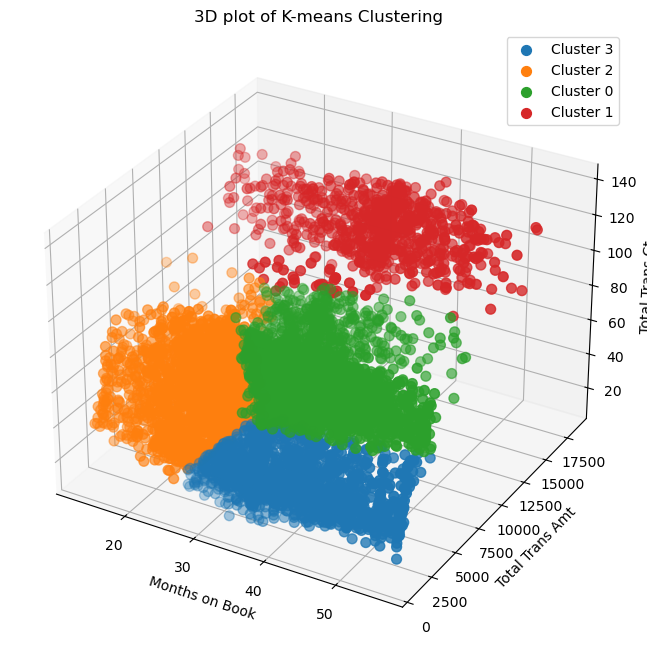

In [255]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame and it already contains the 'Cluster' column from K-means

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in current_customer_df['Cluster'].unique():
    # Filter data points belonging to the current cluster
    cluster_data = current_customer_df[current_customer_df['Cluster'] == cluster]
    ax.scatter(cluster_data['Months_on_book'], cluster_data['Total_Trans_Amt'], cluster_data['Total_Trans_Ct'], label=f'Cluster {cluster}', s=50)

ax.set_xlabel('Months on Book')
ax.set_ylabel('Total Trans Amt')
ax.set_zlabel('Total Trans Ct')
ax.set_title('3D plot of K-means Clustering')
ax.legend()
plt.show()

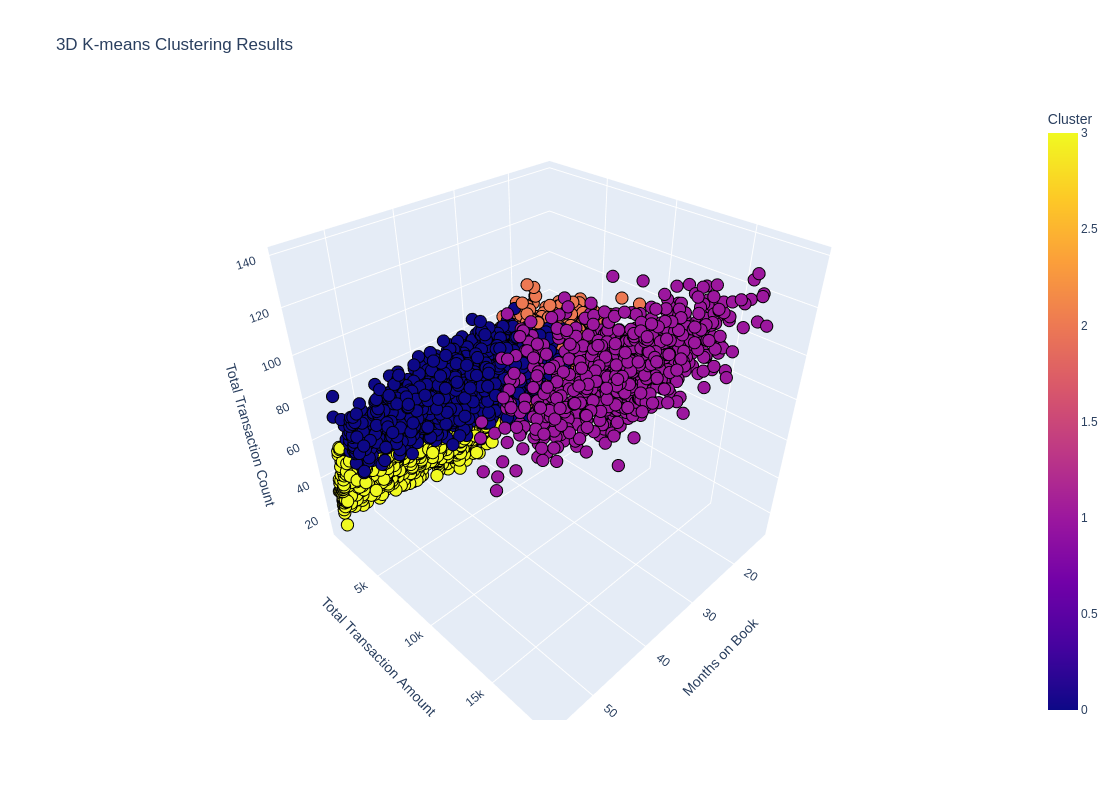

In [256]:
import plotly.express as px

# Assuming 'df' has the results of K-means clustering and includes 'Cluster' column
# Also assuming you have three relevant features for 3D visualization: 'Months_on_book', 'Total_Trans_Amt', 'Total_Trans_Ct'

fig = px.scatter_3d(current_customer_df, x='Months_on_book', y='Total_Trans_Amt', z='Total_Trans_Ct',
                    color='Cluster',  # Color points by cluster assignment
                    title='3D K-means Clustering Results',
                    labels={'Months_on_book': 'Months on Book', 
                            'Total_Trans_Amt': 'Total Transaction Amount',
                            'Total_Trans_Ct': 'Total Transaction Count'},
                    hover_data=['Cluster'])  # Shows cluster number on hover

# Customize marker appearance
fig.update_traces(marker=dict(size=4,  # Adjust size of markers
                              line=dict(width=1, color='DarkSlateGrey')),  # Outline of points
                  selector=dict(mode='markers'))


# Adjust the plot size
fig.update_layout(width=1000, height=800)  # Customize the size as needed

# Show the figure
fig.show()

In [ ]:
# next up 
# need to scatter the attrited customers
# need to get the clusters to identify our target candidates
# need to show the distribustions of transactions and transaction ammounts for the clsters (bell curve)
# Find a way to flag the customers we like with a svm or something of the like... 

# Goodnight


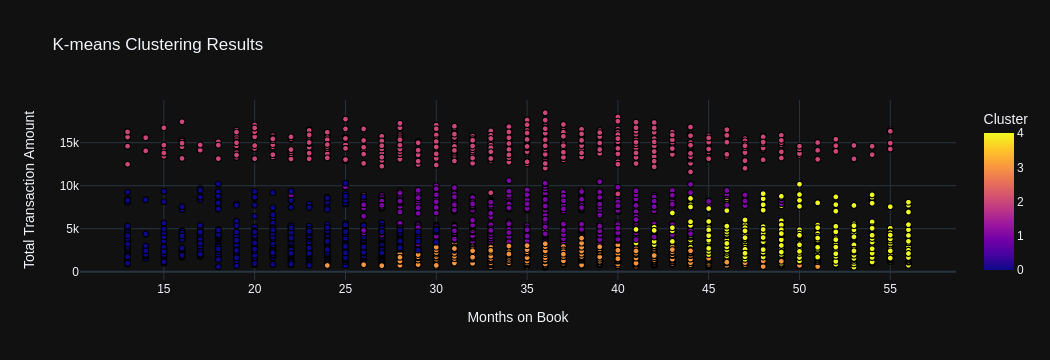

In [144]:
import plotly.express as px

# Assuming 'df' has columns 'Months_on_book', 'Total_Trans_Amt', and 'Cluster' from the K-means result
# Selecting two dimensions to plot, for example, 'Months_on_book' and 'Total_Trans_Amt'
# Note: Plotting more than 2 or 3 dimensions requires different plotting strategies since Plotly plots in 2D or 3D space

fig = px.scatter(df, x='Months_on_book', y='Total_Trans_Amt',
                 color='Cluster',  # Color points by cluster assignment
                 title='K-means Clustering Results',
                 labels={'Months_on_book': 'Months on Book', 'Total_Trans_Amt': 'Total Transaction Amount'},
                 template='plotly_dark',  # Optional: for a dark theme
                 hover_data=['Cluster'])  # Shows cluster number on hover

fig.update_traces(marker=dict(line=dict(width=1,
                                        color='LightSkyBlue')),  # Setting the outline of points
                  selector=dict(mode='markers'))

fig.show()


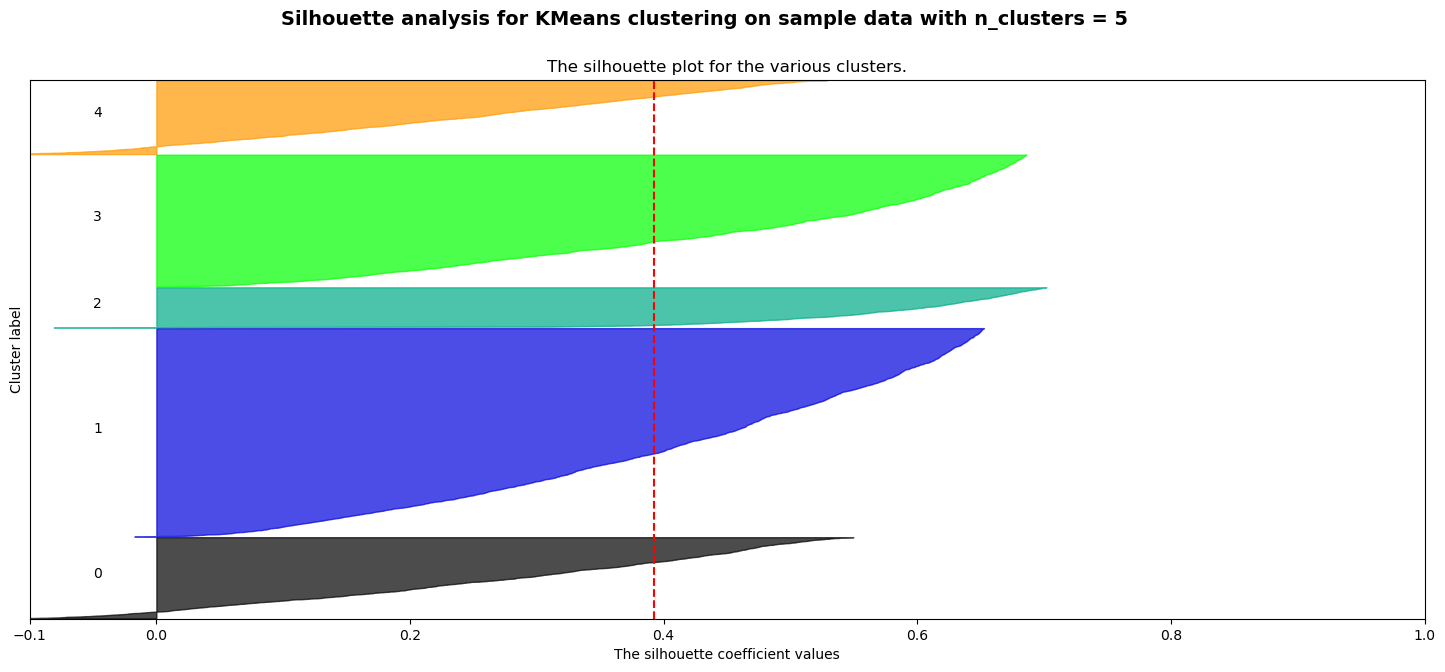

In [145]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming kmeans has already been fit to X_clustering_scaled as shown in your code snippet
n_clusters = 5

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X_clustering_scaled, kmeans.labels_)

# Create a subplot with 1 row and 1 column
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The silhouette plot ranges from -1 to 1 but here we focus on -0.1 to 1
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters to demarcate them clearly.
ax1.set_ylim([0, len(X_clustering_scaled) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = silhouette_vals[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
average_silhouette_score = silhouette_score(X_clustering_scaled, kmeans.labels_)
ax1.axvline(x=average_silhouette_score, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}", fontsize=14, fontweight='bold')

plt.show()

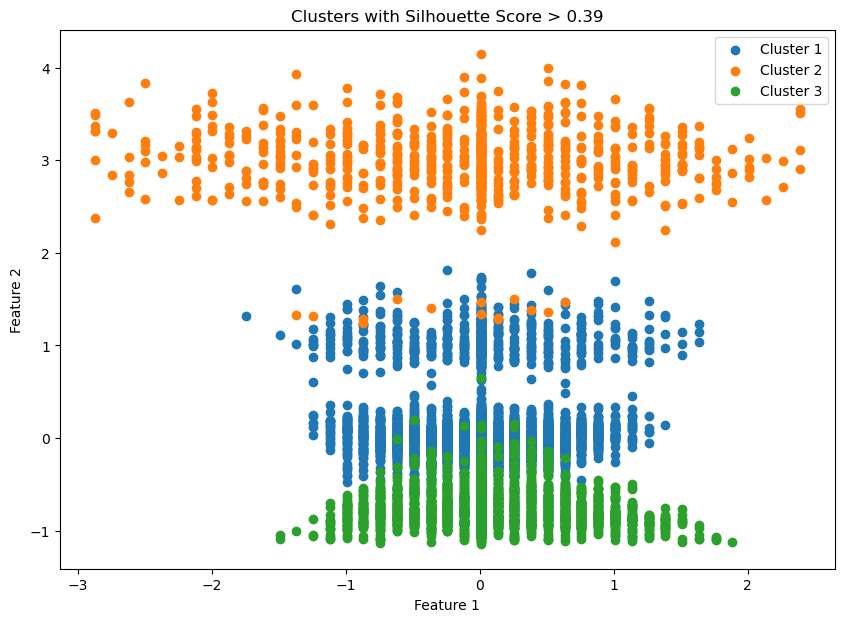

In [146]:

# Step 1: Compute silhouette scores for each data point
silhouette_vals = silhouette_samples(X_clustering_scaled, kmeans.labels_)

# Create an array to hold the average silhouette score of each cluster
cluster_scores = np.zeros(kmeans.n_clusters)

# Calculate the average silhouette score for each cluster
for i in range(kmeans.n_clusters):
    cluster_scores[i] = np.mean(silhouette_vals[kmeans.labels_ == i])

# Identify clusters with an average silhouette score greater than 0.39
selected_clusters = np.where(cluster_scores > 0.39)[0]

# Step 2: Plot only the selected clusters
plt.figure(figsize=(10, 7))

for cluster in selected_clusters:
    # Plot each selected cluster with a unique color
    plt.scatter(X_clustering_scaled[kmeans.labels_ == cluster, 0],  # Assuming the 1st dimension/feature for x-axis
                X_clustering_scaled[kmeans.labels_ == cluster, 1],  # Assuming the 2nd dimension/feature for y-axis
                label=f'Cluster {cluster}')

plt.title('Clusters with Silhouette Score > 0.39')
plt.xlabel('Feature 1')  # Adjust as per your dataset
plt.ylabel('Feature 2')  # Adjust as per your dataset
plt.legend()
plt.show()

In [192]:
# Analyze clusters to identify which one(s) could be considered high-value (this step is manual and based on domain knowledge)
# For illustration, let's assume cluster 2 is high-value
df['High_Value'] = df['Cluster'] == 2

In [193]:
# Selecting features for the classification model (excluding transactional data as specified)
features_for_classification = ['Customer_Age', 'Gender', 'Education_Level', 'Income_Category', 'Dependent_count', 'Marital_Status']
X_classification = df[features_for_classification]
y_classification = df['High_Value']

In [194]:
# Encoding categorical variables
encoder = OneHotEncoder(sparse=False)
X_classification_encoded = encoder.fit_transform(X_classification)

/home/yewi/anaconda3/envs/dev-ai/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [195]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_classification_encoded, y_classification, test_size=0.2, random_state=42)


In [196]:
# Step 4: Train a RandomForest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [197]:
# Prediction and Evaluation
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.55      0.50      0.52       896
        True       0.63      0.67      0.65      1130

    accuracy                           0.59      2026
   macro avg       0.59      0.58      0.58      2026
weighted avg       0.59      0.59      0.59      2026

Accuracy Score: 0.5947680157946693


In [ ]:
# Below is a dead end solution that led me to test the above path next

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [159]:
# Convert 'Attrition_Flag' into a binary variable 
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Existing Customer' else 0)

# Split the dataset
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']


In [160]:
# verify the Attrition_Flag vol was correctly overwritten
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [161]:
# Converting categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

In [162]:
# Look back at it 
X

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,True,False,False,False,True,False,False,False
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,False,False,False,False,True,False,True,False,False,False
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,False,False,False,True,False,False,True,False,False,False
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,False,False,False,False,True,False,True,False,False,False
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,4003.0,1851,2152.0,...,False,True,False,False,False,False,True,False,False,False
10123,710638233,41,2,25,4,2,3,4277.0,2186,2091.0,...,False,True,False,False,False,False,True,False,False,False
10124,716506083,44,1,36,5,3,4,5409.0,0,5409.0,...,False,False,False,False,True,False,True,False,False,False
10125,717406983,30,2,36,4,3,3,5281.0,0,5281.0,...,False,True,False,False,False,False,True,False,False,False


In [163]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [164]:
# Standardizing the features for PCA
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
#
# Train the Random Forest model
clf = RandomForestClassifier(random_state=42, n_estimators=1000).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 1.0


In [167]:
# Get the feature importance array
feature_importances = clf.feature_importances_

In [168]:
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:10]

[(0.3903677948840086,
  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'),
 (0.38598802217665207,
  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'),
 (0.05246780536514861, 'Total_Trans_Ct'),
 (0.04100669305088489, 'Total_Trans_Amt'),
 (0.03412320791609461, 'Total_Ct_Chng_Q4_Q1'),
 (0.030400691612128005, 'Total_Revolving_Bal'),
 (0.016920954566713532, 'Avg_Utilization_Ratio'),
 (0.00944980404880503, 'Total_Relationship_Count'),
 (0.008674438143900842, 'Total_Amt_Chng_Q4_Q1'),
 (0.004880574782738522, 'Contacts_Count_12_mon')]

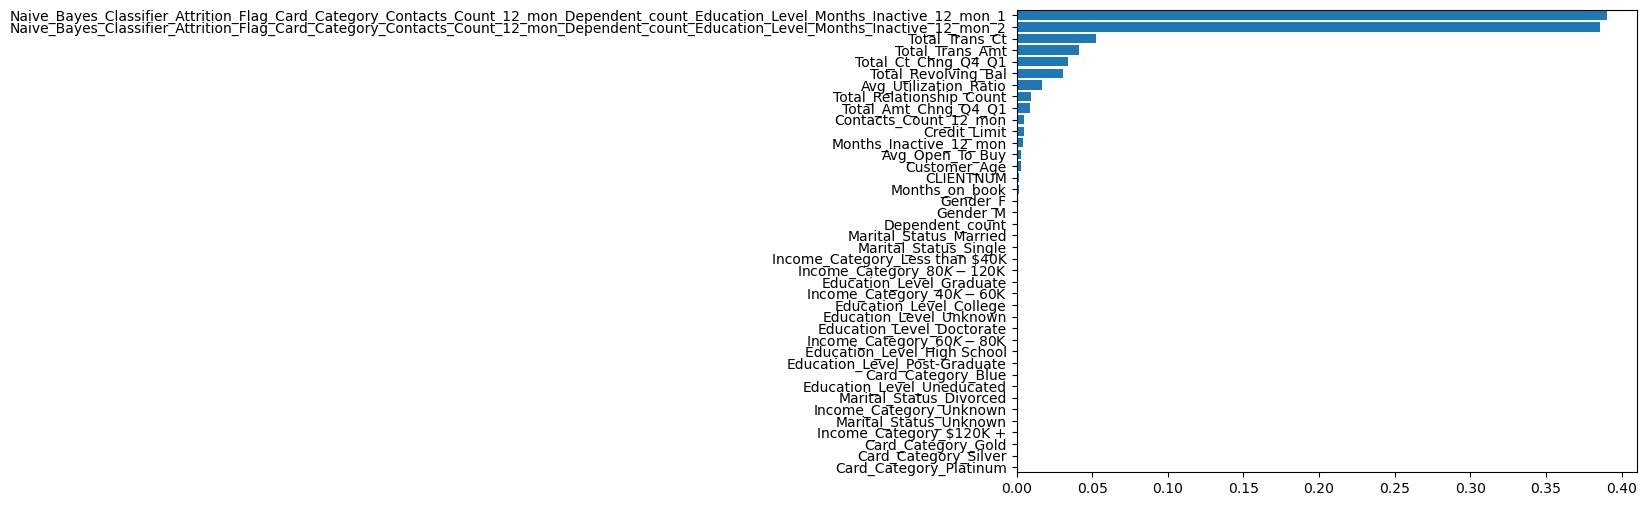

In [169]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [28]:
# Apply PCA
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [30]:
# Train a classification model 
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

ValueError: X has 40 features, but RandomForestClassifier is expecting 27 features as input.

In [31]:
# Predictions
y_pred = clf.predict(X_test_pca)

In [32]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Optionally, explore the PCA components
print("PCA Component Shape:", pca.components_.shape)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       327
           1       1.00      1.00      1.00      1699

    accuracy                           1.00      2026
   macro avg       1.00      0.99      1.00      2026
weighted avg       1.00      1.00      1.00      2026

Accuracy Score: 0.9975320829220138
PCA Component Shape: (27, 40)


In [ ]:
pip install plotly


In [201]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_combinations(n):
    """Calculate the total number of combinations for each number of nodes from 2 to n."""
    return sum(factorial(n) / (factorial(k) * factorial(n - k)) for k in range(2, n + 1))

In [202]:
lout = []


for i in range(100):
    lout.append(calculate_combinations(i))


# Plot lout

NameError: name 'factorial' is not defined

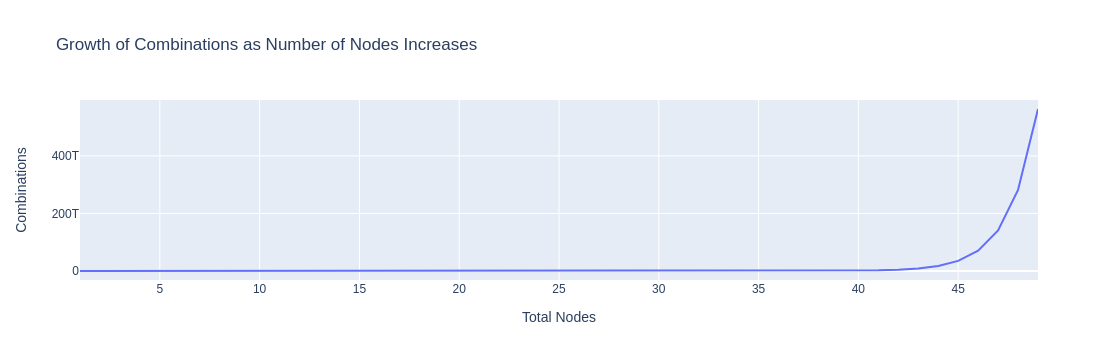

In [212]:
import pandas as pd
from math import factorial
import plotly.express as px

def calculate_combinations(n):
    """Calculate the total number of combinations for each number of nodes from 2 to n."""
    return sum(factorial(n) / (factorial(k) * factorial(n - k)) for k in range(2, n + 1))

# Create a list for combinations
lout = []
numm = 50
# Adjust the range to start from 1 since your function calculates from 2 to n
for i in range(1, numm):  # Start from 1 to include up to 100
    lout.append(calculate_combinations(i))

# Create a DataFrame for Plotly
pxdf = pd.DataFrame({
    'Total Nodes': range(1, numm),
    'Combinations': lout
})

# Use Plotly to create an interactive chart
fig = px.line(pxdf, x='Total Nodes', y='Combinations', title='Growth of Combinations as Number of Nodes Increases',
              labels={'Total Nodes': 'Total Nodes', 'Combinations': 'Combinations'})

fig.show()



In [210]:
lout[998]

5.357543035931338e+300